In [143]:
import sys
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, LSTM, RepeatVector, TimeDistributed
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

from keras.datasets import cifar10
from keras.datasets import mnist

from keras.utils import to_categorical
from keras import backend as K

import tensorflow as tf 
 
import numpy as np
import pandas as pd
import time
from scipy.ndimage.interpolation import rotate

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from tensorflow.python.keras.backend import eager_learning_phase_scope

import plotly.graph_objects as go 

import seaborn as sns

import pickle

class IO:
    def __init__(self, file_name):
        self.file_name = file_name
        
    def to_pickle(self, obj):
        with open(self.file_name, 'wb') as output:
            pickle.dump(obj, output, protocol=pickle.HIGHEST_PROTOCOL)
    
    def read_pickle(self):
        with open(self.file_name, 'rb') as input_:
            obj = pickle.load(input_)
        return obj

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X1 = np.array([rotate(X_test[9978], i, reshape=False) for i in range(60, 120, 5)])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
class LeNet:
    def __init__(self):
        model = Sequential()
        model.add(Conv2D(20, (5, 5), input_shape=(28, 28, 1), padding='same'))
        model.add(Dropout(0.5))
        model.add(MaxPooling2D((2, 2), strides=2))
        model.add(Conv2D(50, (5, 5), padding='same'))
        model.add(Dropout(0.5))
        model.add(MaxPooling2D((2, 2), strides=2))
        model.add(Flatten())
        model.add(Dense(500, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(10))
        model.add(Activation('softmax'))
        self.model = model

    def fit(self, X_train, y_train, validation_data, lr=0.01, epochs=10, batch_size=64, verbose=0):
        self.model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=lr), metrics=['accuracy'])
        self.result = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, \
                                     validation_data=validation_data, verbose=verbose)
        return self


In [56]:
class LeNet_ND:
    def __init__(self):
        model = Sequential()
        model.add(Conv2D(20, (5, 5), input_shape=(28, 28, 1), padding='same'))
        model.add(MaxPooling2D((2, 2), strides=2))
        model.add(Conv2D(50, (5, 5), padding='same'))
        model.add(MaxPooling2D((2, 2), strides=2))
        model.add(Flatten())
        model.add(Dense(500, activation='relu'))
        model.add(Dense(10))
        model.add(Activation('softmax'))
        self.model = model

    def fit(self, X_train, y_train, validation_data, lr=0.01, epochs=10, batch_size=64, verbose=0):
        self.model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=lr), metrics=['accuracy'])
        self.result = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, \
                                     validation_data=validation_data, verbose=verbose)
        return self


# Youtube manual no functions defined


In [80]:
LeNet_ND= Sequential([(Conv2D(20, (5, 5), input_shape=(28, 28, 1), padding='same')),(MaxPooling2D((2, 2), strides=2)),(Conv2D(50, (5, 5), padding='same')),(MaxPooling2D((2, 2), strides=2)),(Flatten()),(Dense(500, activation='relu')),(Dense(10)),(Activation('softmax'))])

In [82]:
LeNet_D = Sequential([(Conv2D(20, (5, 5), input_shape=(28, 28, 1), padding='same')),Dropout(0.5),(MaxPooling2D((2, 2), strides=2)),(Conv2D(50, (5, 5), padding='same')),Dropout(0.5),(MaxPooling2D((2, 2), strides=2)),(Flatten()),(Dense(500, activation='relu')),Dropout(0.5),(Dense(10)),(Activation('softmax'))])

In [83]:
print(LeNet_ND.summary())
print(LeNet_D.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2450)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 500)               1225500   
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

In [98]:
LeNet_D.compile(loss = "categorical_crossentropy", 
                optimizer=SGD(lr=0.01), 
                metrics=['accuracy'])

In [96]:
callback = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", patience = 2)

In [99]:
history_LeNetD =LeNet_D.fit(X_train,y_train, epochs= 10, validation_split=0.2, callbacks=callback)

Epoch 1/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.4800 - accuracy: 0.8446 - val_loss: 0.3571 - val_accuracy: 0.9462
Epoch 2/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.1761 - accuracy: 0.9459 - val_loss: 0.2613 - val_accuracy: 0.9529
Epoch 3/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.1347 - accuracy: 0.9587 - val_loss: 0.2061 - val_accuracy: 0.9628
Epoch 4/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1105 - accuracy: 0.9660 - val_loss: 0.2190 - val_accuracy: 0.9525
Epoch 5/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0993 - accuracy: 0.9682 - val_loss: 0.1771 - val_accuracy: 0.9613
Epoch 6/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0884 - accuracy: 0.9730 - val_loss: 0.1711 - val_accuracy: 0.9632
Epoch 7/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0849 - accuracy: 0.9739 - val_loss: 0.1592 -

In [102]:
class MCDropout (Dropout):
    def call(self, inputs):
        return super().call(inputs, training = True)

In [103]:
LeNet_MD = Sequential([(Conv2D(20, (5, 5), input_shape=(28, 28, 1), padding='same')),MCDropout(0.5),(MaxPooling2D((2, 2), strides=2)),(Conv2D(50, (5, 5), padding='same')),MCDropout(0.5),(MaxPooling2D((2, 2), strides=2)),(Flatten()),(Dense(500, activation='relu')),MCDropout(0.5),(Dense(10)),(Activation('softmax'))])

In [104]:
print(LeNet_MD.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
mc_dropout (MCDropout)       (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 50)        25050     
_________________________________________________________________
mc_dropout_1 (MCDropout)     (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2450)            

In [107]:
LeNet_MD.compile(loss = "categorical_crossentropy", 
                optimizer=SGD(lr=0.01), 
                metrics=['accuracy'])

In [108]:
history_LeNetMD =LeNet_MD.fit(X_train,y_train, epochs= 10, validation_split=0.2, callbacks=callback)

Epoch 1/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.4582 - accuracy: 0.8540 - val_loss: 0.2106 - val_accuracy: 0.9344
Epoch 2/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.1807 - accuracy: 0.9440 - val_loss: 0.1627 - val_accuracy: 0.9497
Epoch 3/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.1381 - accuracy: 0.9575 - val_loss: 0.1254 - val_accuracy: 0.9618
Epoch 4/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.1118 - accuracy: 0.9652 - val_loss: 0.1090 - val_accuracy: 0.9659
Epoch 5/10
1500/1500 [==============================] - 53s 36ms/step - loss: 0.1038 - accuracy: 0.9678 - val_loss: 0.1046 - val_accuracy: 0.9686
Epoch 6/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0916 - accuracy: 0.9711 - val_loss: 0.0943 - val_accuracy: 0.9695
Epoch 7/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0849 - accuracy: 0.9739 - val_loss: 0.0878 -

In [113]:
#weight adjustment due to dropout
weights = LeNet_MD.get_weights()
weights[0] *= 1/0.4
LeNet_MD.set_weights(weights)

In [121]:
import plotly.graph_objects as go 


In [221]:
Y_pred = np.stack([LeNet_MD.predict(X_test) for sample in range(10)])
# Passing in the same input 10 times, we get a different output for each of the 10 times as we applied dropout 
# Sampling from the posterior of a bayesian distribution approximately 
# And allow us to do the uncertainty estimation 


In [261]:
Y_pred_c = np.stack([LeNet_MD.predict_classes(X_test) for sample in range(10)])


In [354]:
print(Y_pred_c)

[[7 2 1 ... 4 5 6]
 [7 2 1 ... 4 5 6]
 [7 2 1 ... 4 5 6]
 ...
 [7 2 1 ... 4 5 6]
 [7 2 1 ... 4 5 6]
 [7 2 1 ... 4 5 6]]


In [204]:
mean = np.mean(y_pred,0)
ep_uncertainty = np.std(y_pred,0)


In [266]:
gs = gridspec.GridSpec(1, len(X_test[0]))

for i in range(len(X_test[0])):
    plt.subplot(gs[i])
    plt.imshow(X_test.squeeze()[i], cmap='gray');
    plt.axis('off');

In [293]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_test)

[7 2 1 ... 4 5 6]


In [353]:
#print(Y_pred_c[:,7])

print((Y_pred[1,:]))

[[0.0000000e+00 0.0000000e+00 2.1773154e-35 ... 1.0000000e+00
  0.0000000e+00 8.6031672e-37]
 [0.0000000e+00 6.5105719e-32 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [7.4253292e-32 1.0000000e+00 6.9515741e-31 ... 2.0482049e-32
  2.2766124e-31 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.9235149e-33]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  2.8941185e-20 4.8957750e-35]
 [2.7235372e-35 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


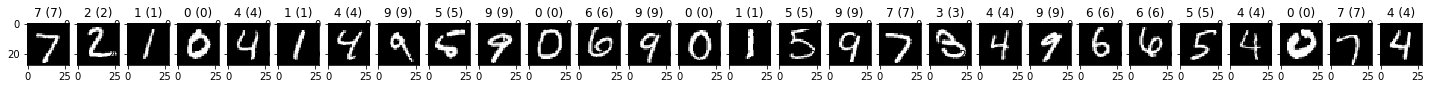

In [311]:
#Print mage with predicted class + probability
fig = fig = plt.figure(figsize=(25, 4))
for i in range(len(X_test[0])):
    ax = fig.add_subplot(gs[i])
    ax.imshow(X_test.squeeze()[i], cmap='gray');
    ax.set_title("{} ({})".format(str(Y_pred_c[0,i].item()), str(y_test[i].item())))

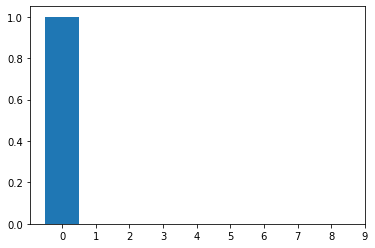

In [321]:
bins = [0,1,2,3,4,5,6,7,8,9]
plt.hist(Y_pred_c[:,3],range(0,10), align = "left", density = True)
plt.xticks(bins)
plt.show()

# End youtube

In [15]:
lenet1 = LeNet().fit(X_train, y_train, (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
938/938 [==============================] - 46s 49ms/step - loss: 0.5310 - accuracy: 0.8296 - val_loss: 0.4385 - val_accuracy: 0.9423
Epoch 2/10
938/938 [==============================] - 48s 51ms/step - loss: 0.2121 - accuracy: 0.9343 - val_loss: 0.3067 - val_accuracy: 0.9555
Epoch 3/10
938/938 [==============================] - 50s 54ms/step - loss: 0.1584 - accuracy: 0.9511 - val_loss: 0.2248 - val_accuracy: 0.9683
Epoch 4/10
938/938 [==============================] - 49s 53ms/step - loss: 0.1309 - accuracy: 0.9594 - val_loss: 0.1968 - val_accuracy: 0.9723
Epoch 5/10
938/938 [==============================] - 50s 54ms/step - loss: 0.1155 - accuracy: 0.9641 - val_loss: 0.1723 - val_accuracy: 0.9726
Epoch 6/10
938/938 [==============================] - 50s 53ms/step - loss: 0.1042 - accuracy: 0.9677 - val_loss: 0.1605 - val_accuracy: 0.9747
Epoch 7/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0979 - accuracy: 0.9701 - val_loss: 0.1459 - val_accuracy:

In [57]:
lene2= LeNet_ND().fit(X_train, y_train, (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
938/938 [==============================] - 37s 39ms/step - loss: 0.5673 - accuracy: 0.8481 - val_loss: 0.2455 - val_accuracy: 0.9195
Epoch 2/10
938/938 [==============================] - 34s 37ms/step - loss: 0.1706 - accuracy: 0.9500 - val_loss: 0.1361 - val_accuracy: 0.9587
Epoch 3/10
938/938 [==============================] - 35s 37ms/step - loss: 0.1154 - accuracy: 0.9655 - val_loss: 0.0927 - val_accuracy: 0.9724
Epoch 4/10
938/938 [==============================] - 35s 37ms/step - loss: 0.0891 - accuracy: 0.9731 - val_loss: 0.0746 - val_accuracy: 0.9776
Epoch 5/10
938/938 [==============================] - 34s 36ms/step - loss: 0.0736 - accuracy: 0.9780 - val_loss: 0.0677 - val_accuracy: 0.9776
Epoch 6/10
938/938 [==============================] - 33s 36ms/step - loss: 0.0637 - accuracy: 0.9808 - val_loss: 0.0579 - val_accuracy: 0.9813
Epoch 7/10
938/938 [==============================] - 33s 36ms/step - loss: 0.0553 - accuracy: 0.9833 - val_loss: 0.0525 - val_accuracy:

In [199]:
def predict(model, X, T=1000):
    standard_pred = model.predict_classes(X)
    prob_pred = model.predict(X_test)
    #f1 = K.function([model.layers[0].input, K.learning_phase()], [model.layers[-2].output])
    #f2 = K.function([model.layers[0].input, K.learning_phase()], [model.layers[-1].output])
    #y1 = np.array([f1([X, 1]) for _ in range(T)]).squeeze()
    #y2 = np.array([f2([X, 1]) for _ in range(T)]).squeeze()
    return standard_pred, prob_pred

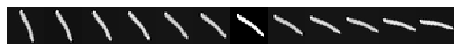

In [26]:
plt.figure(figsize=(8, 1))
gs = gridspec.GridSpec(1, 12)
gs.update(wspace=0, hspace=0)
for i in range(len(X1)):
    plt.subplot(gs[i])
    plt.imshow(X1[i].squeeze(), cmap='gray');
    plt.axis('off');

In [61]:

pred,prob = predict(lenet1.model, X_test)
print(pred)
print(prob)


[7 2 1 ... 4 5 6]
[[6.9087524e-05 4.7816797e-05 1.2086187e-03 ... 9.9623519e-01
  1.0914312e-04 7.3945773e-04]
 [1.2703806e-03 6.7076162e-03 9.8826593e-01 ... 3.1379612e-05
  2.7621910e-03 5.6982767e-06]
 [4.9655726e-03 9.2594111e-01 1.6511438e-02 ... 1.6526602e-02
  1.3152014e-02 3.3041399e-03]
 ...
 [7.1595883e-07 8.1493075e-05 6.4977201e-07 ... 6.3518579e-05
  1.3715186e-04 6.0407224e-04]
 [6.3670398e-04 2.9100254e-04 8.3456674e-05 ... 1.8532810e-04
  5.9425119e-02 1.4698332e-04]
 [1.5492106e-03 9.8292358e-06 1.5805550e-04 ... 2.9230409e-07
  1.0462255e-04 6.8893082e-06]]


In [62]:
pred,prob = predict(lene2.model, X_test)
print(pred)
print (prob)

[7 2 1 ... 4 5 6]
[[3.87614811e-08 9.48837595e-08 2.76388200e-05 ... 9.99730170e-01
  5.99036809e-07 3.45187218e-05]
 [4.40394660e-06 2.15345761e-04 9.99776185e-01 ... 2.18979218e-12
  1.75538787e-06 3.62449458e-12]
 [1.09741104e-05 9.98839915e-01 3.42261883e-05 ... 1.51788801e-04
  8.01595888e-05 4.95181894e-06]
 ...
 [3.12941478e-11 6.65624666e-10 4.71553803e-11 ... 2.25993944e-07
  5.30724300e-08 1.94063978e-06]
 [3.34614150e-08 4.24237395e-10 7.63687780e-10 ... 8.92792507e-09
  4.45498532e-04 1.13253078e-08]
 [7.28752667e-08 9.11609538e-11 3.88370713e-09 ... 4.90364178e-14
  1.16304895e-08 7.77624493e-11]]
